<a href="https://colab.research.google.com/github/Smartsie/Playground/blob/master/PhotoArt_Autoencoder2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Autoencoders

## Import TensorFlow and other libraries

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import glob
import random
from PIL import Image, ImageOps
from IPython.display import clear_output


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load the dataset
To start, we load the data needed to fit the autoencoder. Each image in this dataset is 224x224 pixels. 

In [4]:
training_dataset_location= "/content/gdrive/MyDrive/Python/PhotoArt/Training_Set/"

In [5]:
# Find all the image files in the specified directory
image_files = glob.glob(training_dataset_location+"*.jpeg")

# Create an empty list to store the images
images = []

# Loop through the list of image files
for file in image_files:
  # Open the image file
  img = Image.open(file)
  # Convert the image to a 3-channel image
  img = img.convert("RGB")
  # Convert the image data to a NumPy array
  image_array = np.array(img)
  # Add the image array to the list of images
  images.append(image_array)

In [6]:
# Scale to 1.0
# Add an axis for the channel
images_array = np.expand_dims(np.array(images), axis=-1)/255.
# Split the images into a training set and a test set
X_train, X_test = train_test_split(images_array, test_size=0.2)


In [7]:
np.shape(X_train)

(128, 224, 224, 3, 1)

In [ ]:
class DisplayImageCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    idx_list=[50,200,300]
    plt.figure(figsize=(20, 2))
    for i in range(0,len(idx_list)):
      idx=idx_list[i]
      # Predict the image
      image=tf.squeeze(autoencoder(X_train[idx:idx+1]))
      # Normalize the image between 0 and 1
      image = (image - np.min(image)) / (np.max(image)- np.min(image))
      # Plot the image
      ax = plt.subplot(1, 6, 2*i+1)
      plt.imshow(tf.squeeze(X_train[idx]))
      ax = plt.subplot(1, 6, 2*i+2)
      plt.imshow(image)
    plt.show()
    #clear_output(wait=True)


**Plot** some images from the train set.


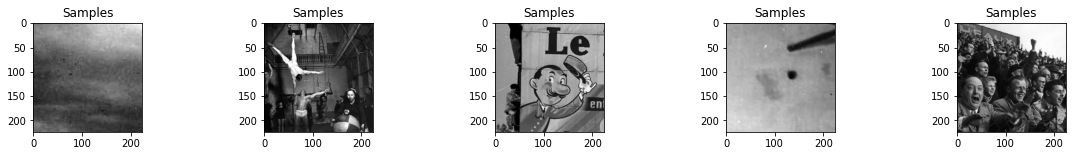

In [ ]:
n = 5
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("Samples")
    m=np.random.randint(0,np.shape(X_train)[0])
    plt.imshow(tf.squeeze(X_train[m]*255.))
    plt.gray()
plt.show()

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.layers import Input, ZeroPadding2D


In [ ]:
# Define the input layer
input_img = Input(shape=(256, 256,1))

# Define the encoder part of the autoencoder
x = Conv2D(4, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Define the decoder part of the autoencoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
#x = ZeroPadding2D(padding=(2,2))(x)
decoded = x

# Combine the encoder and decoder parts to create the autoencoder model
autoencoder = Model(input_img, decoded)

In [ ]:
# Compile the model with a loss function and an optimizer
autoencoder.compile(optimizer='adam', loss="mse")

In [ ]:
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 256, 256, 4)       40        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 4)      0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 4)       148       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 4)        0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 8)         296 

In [ ]:
q=X_train[:,2:254,2:254,:]

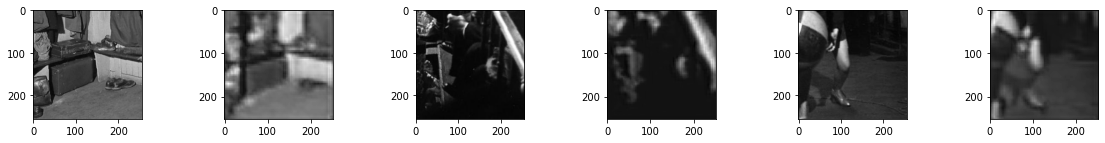

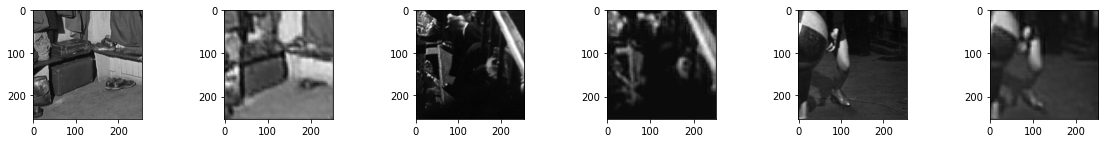

KeyboardInterrupt: ignored

In [ ]:
# Train the model on the input images
autoencoder.fit(X_train, q,
                epochs=10,
                batch_size=4,callbacks=[DisplayImageCallback()],verbose=0)

In [ ]:

encoder=Model(input_img, encoded)
decoder=Model(encoded,decoded)

In [11]:
# Jump here to use MobileNet
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [12]:
# Load the MobileNet model
model = MobileNet(weights='imagenet', include_top=True)
tfmodel = Model(inputs=model.input, outputs=model.layers[-2].output)


In [16]:
#Take a random pic from X_train
x=X_train[64]
#x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)

In [17]:
# Extract features from the image using the MobileNet model
feat = model.predict(x)

1/1 [==============================] - 7s 7s/step


In [18]:
# Calculate the full latent space of the images
vec=model.predict(X_train)

(1, 1000)

In [24]:
random_index=20
# extract image of random!index in test set
x=X_test[random_index]
# calculate the transform
latent_test=model.predict(np.expand_dims(x, axis=0))


1/1 [==============================] - 0s 31ms/step


In [29]:
dot_prod=[]
for i in range(0,len(vec)):
  x=np.dot(tf.squeeze(latent_test),tf.squeeze(vec[i]))/(np.dot(tf.squeeze(latent_test),tf.squeeze(latent_test))+np.dot(tf.squeeze(vec[i]),tf.squeeze(vec[i])))
  dot_prod.append(x)

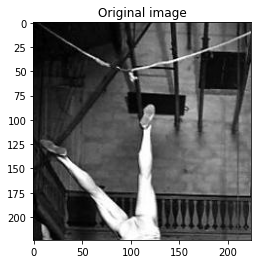

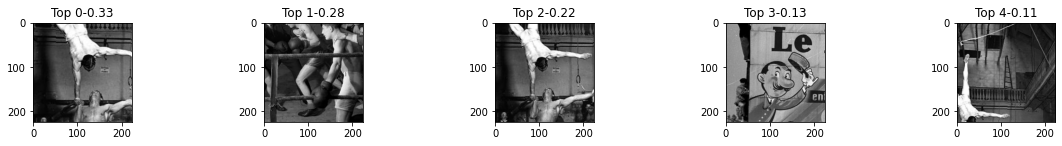

In [30]:
Top5=np.argsort(dot_prod)[-5:][::-1]
#Display the image
plt.title('Original image')
plt.imshow(tf.squeeze(img_test))
plt.gray()
plt.figure(figsize=(20, 4))
for i in range(0,len(Top5)):
  ax = plt.subplot(2, len(Top5), i + 1)
  plt.title("Top "+str(i)+ "-"+str(dot_prod[Top5[i]])[0:4])
  plt.imshow(tf.squeeze(X_train[Top5[i]]))
plt.show()

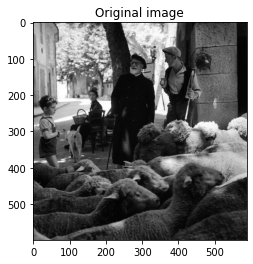

In [54]:
#test_file="robert_doisneau__le_baiser__jpg_5254.jpg"
#test_file="Cyclistes-du-Dimanche.jpg"
test_file="Cure.jpg"
img = Image.open("/content/gdrive/MyDrive/Python/PhotoArt/Test_pictures/"+test_file)
# Convert the image data to a NumPy array
# Convert the image to a 3-channel image
img = img.convert("RGB")
image_array = np.array(img)
plt.title('Original image')
plt.imshow(tf.squeeze(image_array))
plt.gray()
plt.show()
base_image=img

PIL.Image.Image

In [71]:
# crop_size of the crops we are going to take from the picture database
crop_size=224
# How many crops we generate for each picture
n_crops=50

In [79]:
test_array=[]
for i in range(0,n_crops):  
  # Generate a random rotation angle between -3 and 2 degrees
  angle = np.random.uniform(-0, 0)
  # Rotate the image
  rotated_image = base_image.rotate(angle)
  # Generate a random zoom factor between 0.5 and 2
  zoom = np.random.uniform(1, 1)
  # Resize the image using the zoom factor
  resized_image = rotated_image.resize((int(rotated_image.width * zoom), int(rotated_image.height * zoom)))
  # Get the width and height of the resized image
  #resized_image=image
  width, height = resized_image.size
  # Generate random coordinates for the top-left corner of the crop
  x1 = np.random.randint(0, width - crop_size)
  y1 = np.random.randint(0, height - crop_size)
  # Generate random coordinates for the bottom-right corner of the crop
  x2 = x1 + crop_size
  y2 = y1 + crop_size
  # Crop the image
  cropped_image = resized_image.crop((x1, y1, x2, y2))
  # Display the image
  # Save the cropped image to the save folder
  test_array.append(np.array(cropped_image))
# Add an axis for the channel
test_array = np.expand_dims(test_array, axis=-1)/255.

In [80]:
Closest_pics_idx=[]
Pics_to_check=50
# For each image, generate the latent space
for i in range(0,len(test_array)):
  #plt.imshow(tf.squeeze(test_array[i]))
  #plt.show()
  # calculate the transform
  #latent_test=encoded_image(test_array[i])
  latent_test=model.predict(np.expand_dims(test_array[i], axis=0))
  # Calculate Dot product
  dot_prod=[]
  for j in range(0,len(vec)):
    x=np.dot(tf.squeeze(latent_test),tf.squeeze(vec[j]))/(np.dot(tf.squeeze(latent_test),tf.squeeze(latent_test))+np.dot(tf.squeeze(vec[j]),tf.squeeze(vec[j])))
    dot_prod.append(x)
  # Calculate closest images Top N
  TopN=np.argsort(dot_prod)[-Pics_to_check:][::-1]
  Closest_pics_idx.append(TopN)
indexes=np.array(Closest_pics_idx).ravel()

1/1 [==============================] - 0s 17ms/step


In [81]:
from collections import Counter
# Use the Counter class to count the frequency of each number
counter = Counter(indexes)
# Get the top 5 most common numbers
top_five = counter.most_common(10)
print(top_five)
most_common_numbers = [num for num, count in top_five]
print(most_common_numbers)

[(107, 50), (51, 49), (106, 49), (86, 48), (125, 47), (46, 47), (108, 46), (96, 46), (17, 46), (118, 46)]
[107, 51, 106, 86, 125, 46, 108, 96, 17, 118]


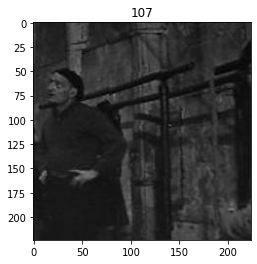

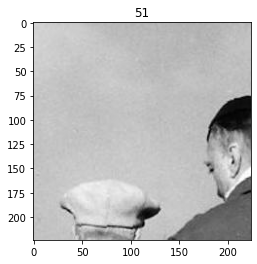

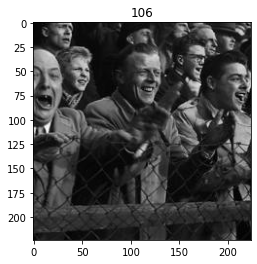

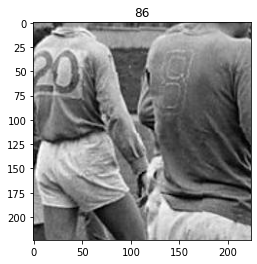

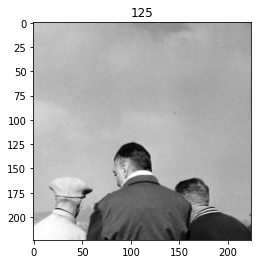

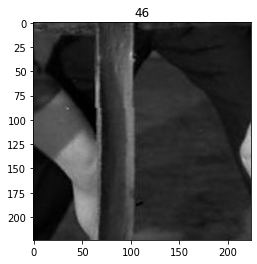

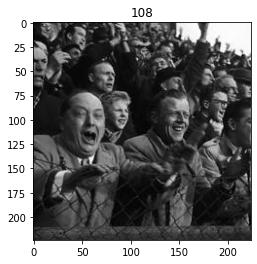

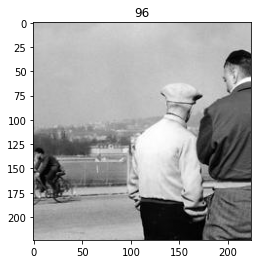

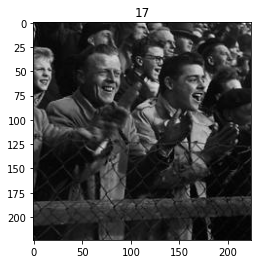

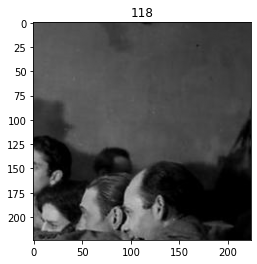

In [82]:
for i in most_common_numbers:
  plt.title(str(i))
  plt.imshow(tf.squeeze(X_train[i]))
  plt.show()

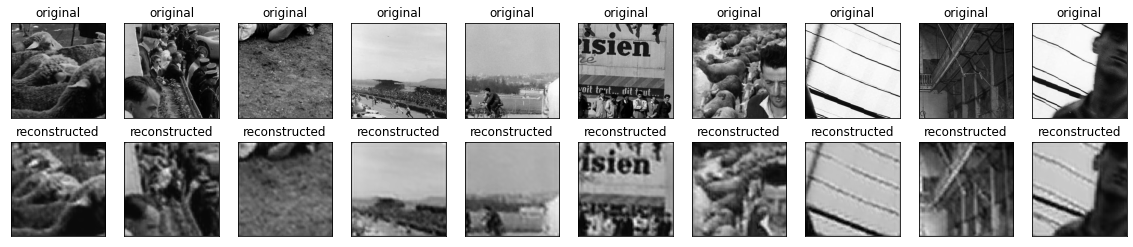

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    index=np.random.randint(0,len(X_test))
    plt.imshow(tf.squeeze(X_test[index]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    # Predict the image
    image=tf.squeeze(autoencoder(X_test[index:index+1]))
    # Normalize the image between 0 and 1
    image = (image - np.min(image)) / (np.max(image)- np.min(image))
    plt.imshow(image)
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [ ]:
def encoded_image(img):
  enc=tf.squeeze(encoder(img)).numpy().ravel()
  return enc

In [ ]:
vec=[]
for i in range(0,len(X_train)):
#  vec.append(encoded_image(X_train[i:i+1]))
  vec.append(encoded_image(X_train[i].reshape(1,256,256)))

In [ ]:
random_index=202
# extract image of random!index in test set
img_test=X_test[random_index]
# calculate the transform
latent_test=encoded_image(X_test[random_index:random_index+1])

In [ ]:
dot_prod=[]
for i in range(0,len(vec)):
  x=np.dot(latent_test,vec[i])/(np.dot(latent_test,latent_test)+np.dot(vec[i],vec[i]))
  dot_prod.append(x)

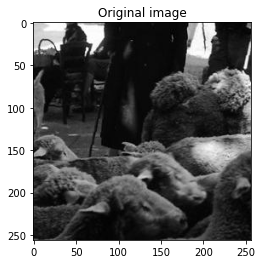

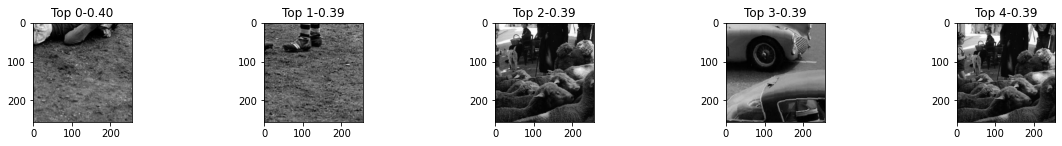

In [ ]:
Top5=np.argsort(dot_prod)[-5:][::-1]
#Display the image
plt.title('Original image')
plt.imshow(tf.squeeze(img_test))
plt.gray()
plt.figure(figsize=(20, 4))
for i in range(0,len(Top5)):
  ax = plt.subplot(2, len(Top5), i + 1)
  plt.title("Top "+str(i)+ "-"+str(dot_prod[Top5[i]])[0:4])
  plt.imshow(tf.squeeze(X_train[Top5[i]]))
plt.show()

In [ ]:
# Next
#Take a random image
#Make 100 samples from it (crop, zoom, etc...)
#Evaluate each of them
#make a distribution of most frequent proximity


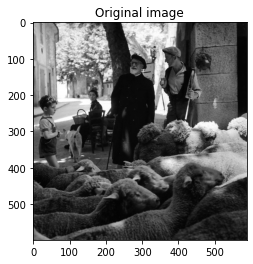

In [ ]:
#test_file="robert_doisneau__le_baiser__jpg_5254.jpg"
#test_file="Cyclistes-du-Dimanche.jpg"
test_file="Cure.jpg"
image = Image.open("/content/gdrive/MyDrive/Python/PhotoArt/Test_pictures/"+test_file)
# Convert the image data to a NumPy array
image=ImageOps.grayscale(image)
image_array = np.array(image)
plt.title('Original image')
plt.imshow(tf.squeeze(image_array))
plt.gray()
plt.show()

In [ ]:
# crop_size of the crops we are going to take from the picture database
crop_size=256
# How many crops we generate for each picture
n_crops=100

In [ ]:
test_array=[]
for i in range(0,n_crops):  
  # Generate a random rotation angle between -3 and 2 degrees
  angle = np.random.uniform(-3, 3)
  # Rotate the image
  rotated_image = image.rotate(angle)
  # Generate a random zoom factor between 0.5 and 2
  zoom = np.random.uniform(0.5, 2)
  # Resize the image using the zoom factor
  resized_image = rotated_image.resize((int(rotated_image.width * zoom), int(rotated_image.height * zoom)))
  # Get the width and height of the resized image
  #resized_image=image
  width, height = resized_image.size
  # Generate random coordinates for the top-left corner of the crop
  x1 = np.random.randint(0, width - crop_size)
  y1 = np.random.randint(0, height - crop_size)
  # Generate random coordinates for the bottom-right corner of the crop
  x2 = x1 + crop_size
  y2 = y1 + crop_size
  # Crop the image
  cropped_image = resized_image.crop((x1, y1, x2, y2))
  # Display the image
  # Save the cropped image to the save folder
  test_array.append(np.array(cropped_image))
# Add an axis for the channel
test_array = np.expand_dims(test_array, axis=-1)/255.

In [ ]:
Closest_pics_idx=[]
Pics_to_check=100
# For each image, generate the latent space
for i in range(0,len(test_array)):
  #plt.imshow(tf.squeeze(test_array[i]))
  #plt.show()
  # calculate the transform
  #latent_test=encoded_image(test_array[i])
  latent_test=tf.squeeze(encoder(test_array[i].reshape(1,256,256))).numpy().ravel()
  # Calculate Dot product
  dot_prod=[]
  for j in range(0,len(vec)):
    x=np.dot(latent_test,vec[j])/(np.dot(latent_test,latent_test)+np.dot(vec[j],vec[j]))
    dot_prod.append(x)
  # Calculate closest images Top N
  TopN=np.argsort(dot_prod)[-Pics_to_check:][::-1]
  Closest_pics_idx.append(TopN)
indexes=np.array(Closest_pics_idx).ravel()

In [ ]:
from collections import Counter
# Use the Counter class to count the frequency of each number
counter = Counter(indexes)
# Get the top 5 most common numbers
top_five = counter.most_common(10)
print(top_five)
most_common_numbers = [num for num, count in top_five]
print(most_common_numbers)

[(42, 71), (459, 71), (655, 69), (232, 66), (121, 64), (783, 64), (58, 63), (534, 62), (18, 62), (712, 61)]
[42, 459, 655, 232, 121, 783, 58, 534, 18, 712]


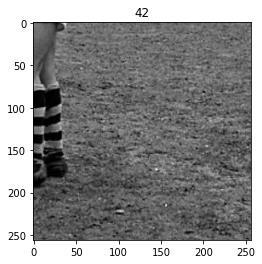

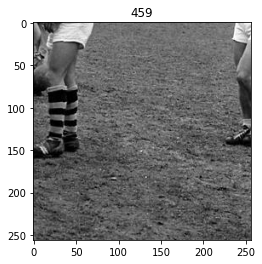

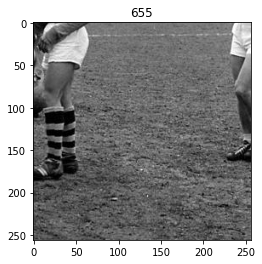

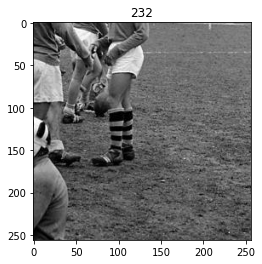

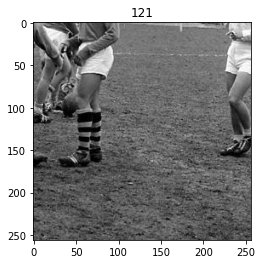

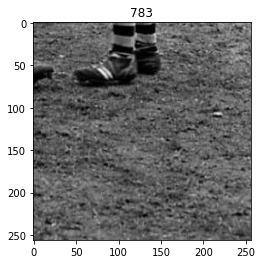

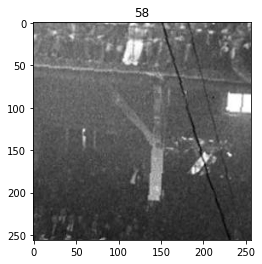

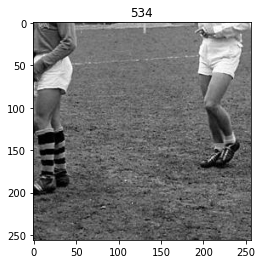

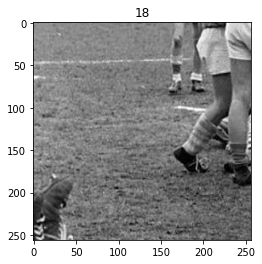

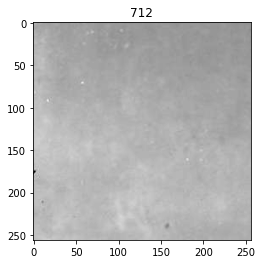

In [ ]:
for i in most_common_numbers:
  plt.title(str(i))
  plt.imshow(tf.squeeze(X_train[i]))
  plt.show()

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [ ]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

In [ ]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to `[0,1]`.


In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot a normal ECG. 

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### Build the model

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')

Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

In [ ]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

In [ ]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.


Plot the reconstruction error on normal ECGs from the training set

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Note: There are other strategies you could use to select a threshold value above which test examples should be classified as anomalous, the correct approach will depend on your dataset. You can learn more with the links at the end of this tutorial. 

If you examine the reconstruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the [precision](https://developers.google.com/machine-learning/glossary#precision) and [recall](https://developers.google.com/machine-learning/glossary#recall) of your classifier. 

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

## Next steps

To learn more about anomaly detection with autoencoders, check out this excellent [interactive example](https://anomagram.fastforwardlabs.com/#/) built with TensorFlow.js by Victor Dibia. For a real-world use case, you can learn how [Airbus Detects Anomalies in ISS Telemetry Data](https://blog.tensorflow.org/2020/04/how-airbus-detects-anomalies-iss-telemetry-data-tfx.html) using TensorFlow. To learn more about the basics, consider reading this [blog post](https://blog.keras.io/building-autoencoders-in-keras.html) by François Chollet. For more details, check out chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.
